# EngiTuto

This is a basic tutorial showing how to use EngiBench and interact with problems.

Author: Florian Felten <ffelten@mavt.ethz.ch>

In [1]:
#!pip install -e ".[all]"

## Step 1: Instantiate a Problem

Let us see the Beam bending problem

In [28]:
from engibench.problems.beams2d.v0 import Beams2D
import numpy as np

In [3]:
problem = Beams2D()
problem.reset(9)

## Step 2: Inspect the Problem

### 2.1: Representation, Objectives, Boundary Conditions
The output just below means our beam is represented by 5000 pixels in `[0, 1]`. They are later reshaped as `(100, 50)`.

In [4]:
problem.design_space

Box(0.0, 1.0, (5000,), float32)

In [5]:
problem.possible_objectives

(('c', 'minimize'),)

In [6]:
problem.boundary_conditions

frozenset({('ft', 1),
           ('max_iter', 100),
           ('nelx', 100),
           ('nely', 50),
           ('overhang_constraint', False),
           ('penal', 3.0),
           ('rmin', 2.0),
           ('volfrac', 0.35)})

### 2.2 Data
We can directly access [the dataset linked to the problem](https://huggingface.co/datasets/IDEALLab/beams_2d_v0) doing the following:

In [7]:
problem.dataset

DatasetDict({
    train: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 950
    })
    val: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 178
    })
    test: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 60
    })
})

## Step 3: Creating a Design and Launching the Simulator
While you usually would generate a design based on a generative or surrogate mode, we here show how to play with a rather random one.

In [8]:
my_design, idx = problem.random_design()
my_design.shape

(5000,)

You can also render designs to see what they look like.

(<Figure size 800x400 with 2 Axes>, <Axes: >)

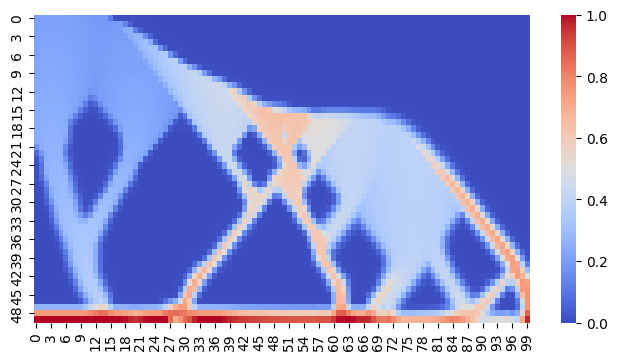

In [9]:
problem.render(my_design)

Finally, you can:
- Simulate a design to get its objective values with `objs = problem.simulate(my_design)`
- Optimize a given design with `optimal_design, objs = problem.optimize(my_design)`

In [10]:
problem.simulate(my_design)

array(2290.3202759)

In [11]:
opt_design, opt_history = problem.optimize(my_design)
opt_history[-1]

ExtendedOptiStep(obj_values=array([127.64329459]), step=100, stored_design=array([1., 1., 1., ..., 1., 1., 1.]))

Now let's see how different is the optimal design from our random design above.

(<Figure size 800x400 with 2 Axes>, <Axes: >)

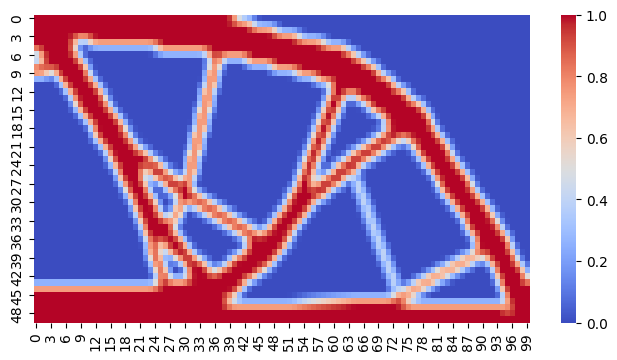

In [12]:
problem.render(opt_design)

### Check the Dataset Keys:

In [13]:
print(problem.dataset.keys())


dict_keys(['train', 'val', 'test'])


### Access a Specific Subset: If you want to access the training dataset:

In [ ]:
train_data = problem.dataset['train']

### Check Available Features:

In [15]:
print(train_data.features)


{'xPrint': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None), 'nelx': Value(dtype='int64', id=None), 'nely': Value(dtype='int64', id=None), 'volfrac': Value(dtype='float64', id=None), 'penal': Value(dtype='float64', id=None), 'rmin': Value(dtype='float64', id=None), 'ft': Value(dtype='int64', id=None), 'max_iter': Value(dtype='int64', id=None), 'overhang_constraint': Value(dtype='int64', id=None), 'compliance': Value(dtype='float64', id=None)}


### Retrieve a Single Example:

In [16]:
example = train_data[0]  # First data point
print(example)


{'xPrint': [0.999304928365, 0.881378425882063, 0.658925756614869, 0.33648548524271615, 0.10382824103500744, 1.809360063290959e-05, 9.251863499390145e-07, 2.7224424822678148e-11, 8.716177756853708e-19, 9.153356134356325e-28, 2.203753201439214e-37, 1.382497969787553e-51, 2.773111471661628e-72, 2.552016099177883e-98, 1.4472391664001647e-132, 2.385259387675573e-181, 3.977945026620805e-215, 9.055526775874829e-71, 1.74099013910304e-44, 7.419067546790173e-26, 4.3577627367325417e-10, 0.08997099298644183, 0.30901157769008175, 0.5775923795783539, 0.797948709493085, 0.9909486720680798, 0.8555337612915648, 0.6323227819133143, 0.32612731188121385, 0.10822698429457615, 0.003911691906184406, 0.0007146397769309296, 5.713616922604347e-07, 2.8239287233161266e-12, 2.6911717611934196e-18, 1.689547091591808e-25, 5.11127136430729e-36, 3.2014424199296693e-51, 1.215189264164585e-70, 4.085787311472602e-95, 1.5806507781983642e-126, 1.1778928410703917e-167, 9.223862493621767e-71, 1.7181731027304947e-44, 7.112696

### Extract Features and Labels for CNN Input: If your input consists of numerical values (nelx, nely, etc.), and your target output is an image stored in 'xPrint', you can do:

In [ ]:
input_features = ['nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance']
X = [example[feature] for feature in input_features]
y = example['xPrint']  # The image to reconstruct
# render(self, design: np.ndarray, nelx: int = 100, nely: int = 50, open_window: bool = False)

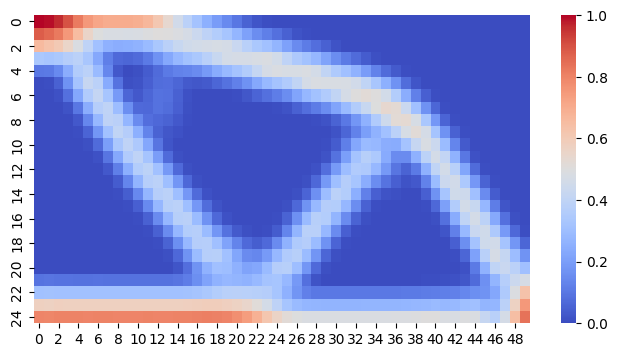

(<Figure size 800x400 with 2 Axes>, <Axes: >)

In [34]:
problem.render(np.array(y),example['nelx'],example['nely'], open_window=True)

### Understanding the problem
You want to train a model that takes numerical inputs (nelx, nely, etc.) and generates an image (xPrint). This is a regression problem where the output is an image.

    Input: A set of numerical values.
    Output: A 2D image (grayscale).
    Goal: Train a model to learn the mapping from input parameters to the image.

### 2. Preprocessing the Data
Before training, we need to properly format the inputs and outputs.
a. Input Preprocessing

    Ensure all numerical inputs are normalized (scaled between 0 and 1 or standardized).
    Convert the inputs into PyTorch tensors.

In [35]:
import torch
import numpy as np

# Example: Normalize the input
def normalize(x, min_val, max_val):
    return (x - min_val) / (max_val - min_val)

input_features = ['nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance']
X = np.array([example[feature] for feature in input_features], dtype=np.float32)
X = normalize(X, np.min(X), np.max(X))  # Normalize

X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(0)  # Add batch dimension


In [37]:
y = np.array(example['xPrint'])  # Convert to numpy array

Image Preprocessing

    Convert the xPrint output into a tensor.
    Resize if necessary (e.g., using interpolation).
    Ensure it’s normalized between 0 and 1.

In [39]:
import torch
import torchvision.transforms as transforms

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

# Load and process image tensor
height, width = example['nely'], example['nelx']  # Get image size
y_tensor = torch.tensor(example['xPrint'], dtype=torch.float32)

# Ensure tensor is (C, H, W)
y_tensor = y_tensor.view(1, height, width)

# Resize image
resize = transforms.Resize((64, 64))  # Target size
y_tensor = resize(y_tensor).squeeze(0)  # Convert back to (H, W)

# Move tensor to device
y_tensor = y_tensor.to(device)

# Print confirmation
print(f"Using device: {device}")
print(f"Resized image shape: {y_tensor.shape}")


Using device: mps
Resized image shape: torch.Size([64, 64])


### Building the CNN Model: CNN-AutoEncoder
Since we are reconstructing an image, a CNN-based autoencoder can work well.

In [45]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, input_dim):
        super(CNNModel, self).__init__()
        
        # Fully connected layer to convert input into an image-like tensor
        self.fc = nn.Linear(input_dim, 1024)  # Increase features for better learning
        self.fc_to_image = nn.Sequential(
            nn.ReLU(),
            nn.Linear(1024, 4096),  # Must match 256 * 4 * 4 for reshaping
            nn.ReLU()
        )
        
        # Transposed CNN to upsample to (1, 64, 64)
        self.conv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # (8,8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),   # (16,16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),    # (32,32)
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),     # (64,64)
            nn.Sigmoid()  # Normalize output to [0,1]
        )

    def forward(self, x):
        x = self.fc(x)
        x = self.fc_to_image(x)
        x = x.view(-1, 256, 4, 4)  # Reshape to a small image
        x = self.conv(x)
        return x  # Output shape: (batch_size, 1, 64, 64)

# Initialize model
input_dim = len(input_features)  # Number of input features
model = CNNModel(input_dim)


### Training the Model
Use Mean Squared Error (MSE) loss since we are dealing with images.
Use Adam Optimizer.

In [47]:

import torch.optim as optim

# Move tensors to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

# Ensure target shape is (batch_size, 1, 64, 64)
y_tensor = y_tensor.view(1, 1, 64, 64)


# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    
    # Forward pass
    output = model(X_tensor)
    
    # Compute loss
    loss = criterion(output, y_tensor)
    
    # Backpropagation
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

print(f"Training complete! Model running on {device}")



Epoch [0/100], Loss: 0.1436
Epoch [10/100], Loss: 0.0601
Epoch [20/100], Loss: 0.0368
Epoch [30/100], Loss: 0.0225
Epoch [40/100], Loss: 0.0132
Epoch [50/100], Loss: 0.0081
Epoch [60/100], Loss: 0.0050
Epoch [70/100], Loss: 0.0031
Epoch [80/100], Loss: 0.0021
Epoch [90/100], Loss: 0.0015
Training complete! Model running on mps


### Visualization 

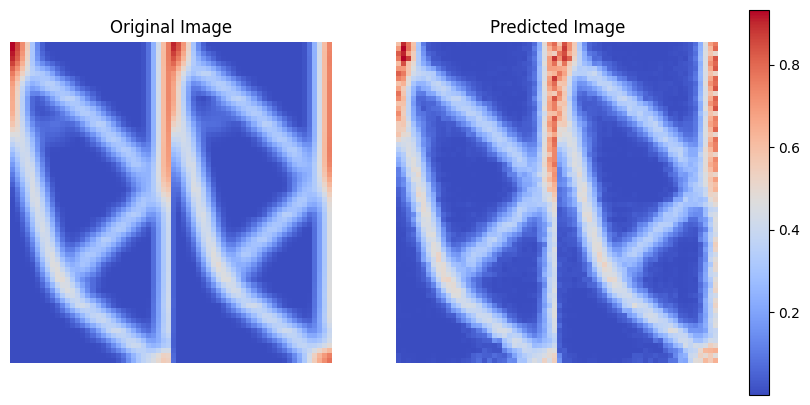

In [49]:
import matplotlib.pyplot as plt

# Get model prediction
with torch.no_grad():
    predicted = model(X_tensor)
    predicted_image = predicted.cpu().squeeze().numpy()  # Convert to NumPy
    original_image = y_tensor.cpu().squeeze().numpy()  # Convert target to NumPy

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(original_image, cmap="coolwarm")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Predicted Image
axes[1].imshow(predicted_image, cmap="coolwarm")
axes[1].set_title("Predicted Image")
axes[1].axis("off")

# Show colorbar and display images
plt.colorbar(axes[1].imshow(predicted_image, cmap="coolwarm"), ax=axes, fraction=0.046, pad=0.04)
plt.show()


## Complete Code for full dataset

Using device: mps
Epoch [1/500], Train Loss: 0.2743, Val Loss: 0.2353
Epoch [2/500], Train Loss: 0.2287, Val Loss: 0.2168
Epoch [3/500], Train Loss: 0.2198, Val Loss: 0.2127
Epoch [4/500], Train Loss: 0.2149, Val Loss: 0.2136
Epoch [5/500], Train Loss: 0.2122, Val Loss: 0.2087
Epoch [6/500], Train Loss: 0.2092, Val Loss: 0.2045
Epoch [7/500], Train Loss: 0.2067, Val Loss: 0.2024
Epoch [8/500], Train Loss: 0.2056, Val Loss: 0.2013
Epoch [9/500], Train Loss: 0.2044, Val Loss: 0.2003
Epoch [10/500], Train Loss: 0.2027, Val Loss: 0.1986
Epoch [11/500], Train Loss: 0.2014, Val Loss: 0.1992
Epoch [12/500], Train Loss: 0.2007, Val Loss: 0.2000
Epoch [13/500], Train Loss: 0.2003, Val Loss: 0.1999
Epoch [14/500], Train Loss: 0.1995, Val Loss: 0.1984
Epoch [15/500], Train Loss: 0.1985, Val Loss: 0.1966
Epoch [16/500], Train Loss: 0.1978, Val Loss: 0.1971
Epoch [17/500], Train Loss: 0.1982, Val Loss: 0.1956
Epoch [18/500], Train Loss: 0.1970, Val Loss: 0.1948
Epoch [19/500], Train Loss: 0.1968, V

/var/folders/wr/hlm5q5sx05j_yrnjr5_7n3p400lkl3/T/ipykernel_17613/2276728138.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_mode

Final Test Loss: 0.1905


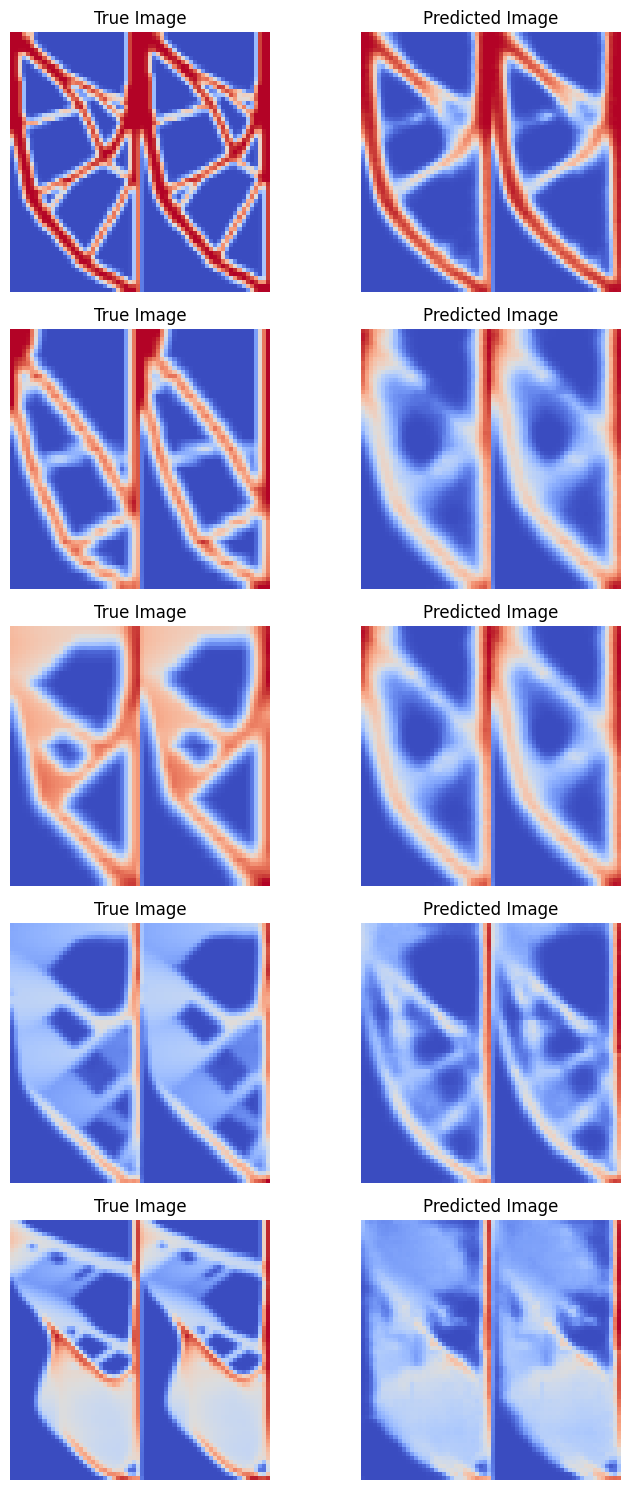

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from pytorch_msssim import ssim

class CustomLoss(nn.Module):
    def __init__(self, alpha=0.85):
        super(CustomLoss, self).__init__()
        self.alpha = alpha  # Weight for SSIM vs MAE

    def forward(self, pred, target):
        l1_loss = F.l1_loss(pred, target)  # MAE
        ssim_loss = 1 - ssim(pred, target, data_range=1.0)  # SSIM Loss (1 - SSIM)
        return self.alpha * l1_loss + (1 - self.alpha) * ssim_loss  # Weighted combination


# Detect device (GPU, MPS for Mac, or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Step 1: Create a PyTorch Dataset
##################################
class BeamDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.input_features = ['nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance']
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        example = self.dataset[idx]

        # Load input features
        X = torch.tensor([example[feature] for feature in self.input_features], dtype=torch.float32)

        # Load and preprocess the image target (xPrint)
        y = torch.tensor(example['xPrint'], dtype=torch.float32)

        # Ensure image is shaped as (1, Height, Width)
        height, width = example['nely'], example['nelx']
        y = y.view(1, height, width)

        # Resize to fixed size (64x64)
        resize = transforms.Resize((64, 64))
        y = resize(y)

        return X, y

# Step 2: Create DataLoaders
############################
batch_size = 8  # More updates per epoch

# Create dataset objects
train_dataset = BeamDataset(problem.dataset['train'])
val_dataset = BeamDataset(problem.dataset['val'])
test_dataset = BeamDataset(problem.dataset['test'])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 3: Define the CNN Model
##############################
class CNNModel(nn.Module):
    def __init__(self, input_dim):
        super(CNNModel, self).__init__()

        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            #nn.Dropout(0.1),  # Dropout to prevent overfitting
            nn.Linear(1024, 4096),
            nn.ReLU(),
            #nn.Dropout(0.1)  # Another dropout layer
        )

        self.conv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 256, 4, 4)
        x = self.conv(x)
        return x

# Initialize model and move to device
input_dim = len(train_dataset.input_features)
model = CNNModel(input_dim).to(device)

# Step 4: Define Training Setup
###############################
# Use the new loss function
criterion = CustomLoss(alpha=0.85)
optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-4)  # Lower learning rate, weight decay for stability
epochs = 500  # Enough epochs with early stopping
patience = 10  # Stop if val loss does not improve for 10 epochs
best_val_loss = float('inf')
epochs_no_improve = 0

# Step 5: Training Loop with Early Stopping
###########################################
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(X_batch)

        # Compute loss
        loss = criterion(outputs, y_batch)

        # Backpropagation
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute average train loss
    train_loss = running_loss / len(train_loader)

    # ---- Validation Phase ----
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)

    # Print losses
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered. Training stopped.")
        break

print("Training complete!")

# Step 6: Load Best Model and Evaluate on Test Set
##################################################
model.load_state_dict(torch.load("best_model.pth"))
model.to(device)
model.eval()

test_loss = 0.0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f"Final Test Loss: {test_loss:.4f}")

# Step 7: Visualize Test Predictions
####################################
num_samples = 5  # Adjust the number of samples to visualize
test_iter = iter(test_loader)
X_batch, y_batch = next(test_iter)

# Move to device
X_batch, y_batch = X_batch.to(device), y_batch.to(device)

# Generate predictions
with torch.no_grad():
    predictions = model(X_batch)

# Convert to NumPy for visualization
y_batch = y_batch.cpu().numpy()  # True images
predictions = predictions.cpu().numpy()  # Predicted images

# Plot test samples
fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 3))

for i in range(num_samples):
    # True image
    axes[i, 0].imshow(y_batch[i].squeeze(), cmap="coolwarm")
    axes[i, 0].set_title("True Image")
    axes[i, 0].axis("off")

    # Predicted image
    axes[i, 1].imshow(predictions[i].squeeze(), cmap="coolwarm")
    axes[i, 1].set_title("Predicted Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


IndexError: index 8 is out of bounds for axis 0 with size 8

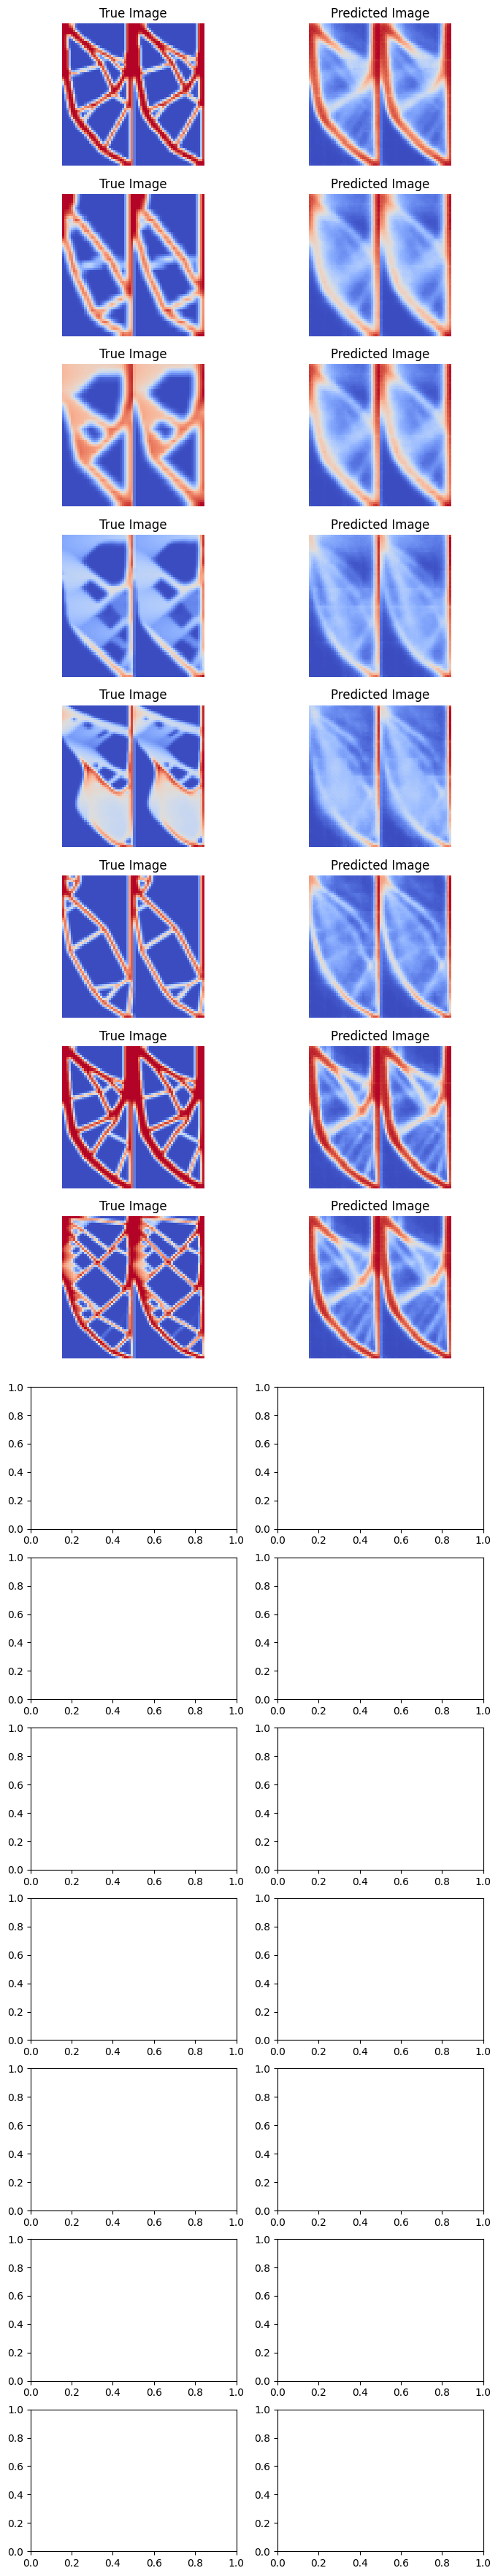

In [55]:
# Step 7: Visualize Test Predictions
####################################
num_samples = 15  # Adjust the number of samples to visualize
test_iter = iter(test_loader)
X_batch, y_batch = next(test_iter)

# Move to device
X_batch, y_batch = X_batch.to(device), y_batch.to(device)

# Generate predictions
with torch.no_grad():
    predictions = model(X_batch)

# Convert to NumPy for visualization
y_batch = y_batch.cpu().numpy()  # True images
predictions = predictions.cpu().numpy()  # Predicted images

# Plot test samples
fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 3))

for i in range(num_samples):
    # True image
    axes[i, 0].imshow(y_batch[i].squeeze(), cmap="coolwarm")
    axes[i, 0].set_title("True Image")
    axes[i, 0].axis("off")

    # Predicted image
    axes[i, 1].imshow(predictions[i].squeeze(), cmap="coolwarm")
    axes[i, 1].set_title("Predicted Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()